In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kaggle.com/datasets/sukhmandeepsinghbrar/house-prices-india

# Первичный анализ

In [2]:
df = pd.read_csv('../Data/german_credit_data_with_risk.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df['Housing'].value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
df[df.duplicated()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [6]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [7]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

# Оценим распределение значений целевой переменной

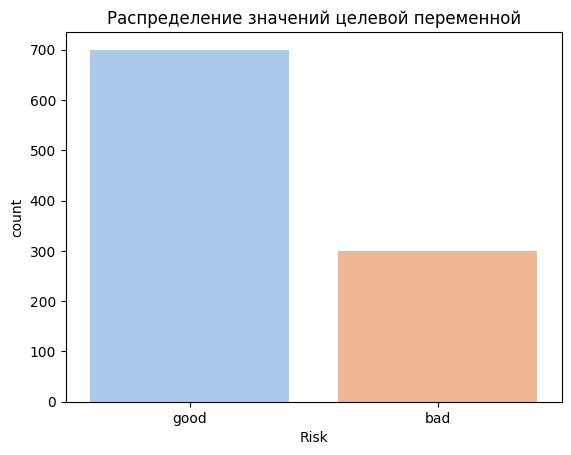

In [8]:
pastel_palette = sns.color_palette("pastel", n_colors=2) 
sns.countplot(data=df, x='Risk', hue='Risk', palette=pastel_palette)
plt.title('Распределение значений целевой переменной')
plt.show()

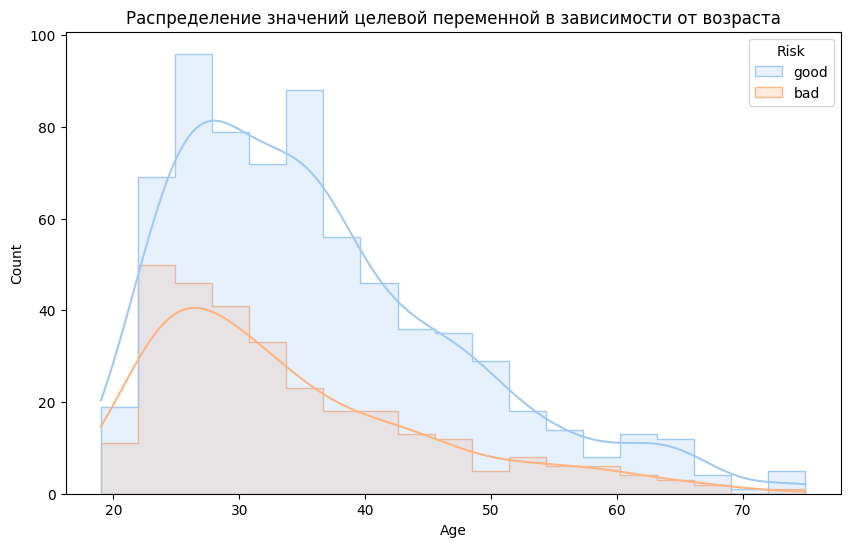

In [9]:
pastel_palette = sns.color_palette("pastel", n_colors=2) 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Risk', kde=True, element="step", stat="count", palette=pastel_palette)
plt.title('Распределение значений целевой переменной в зависимости от возраста')
plt.show()

# Для наглядности выделим возрастные категории

In [10]:
interval = (18, 25, 35, 60, 120)
categories = ['Young', 'Adult', 'Middle', 'Senior']
df["Age category"] = pd.cut(df['Age'], interval, labels=categories)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age category
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Middle
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Middle
4,53,male,2,free,little,little,4870,24,car,bad,Middle
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,Adult
996,40,male,3,own,little,little,3857,30,car,good,Middle
997,38,male,2,own,little,NaN,804,12,radio/TV,good,Middle
998,23,male,2,free,little,little,1845,45,radio/TV,bad,Young


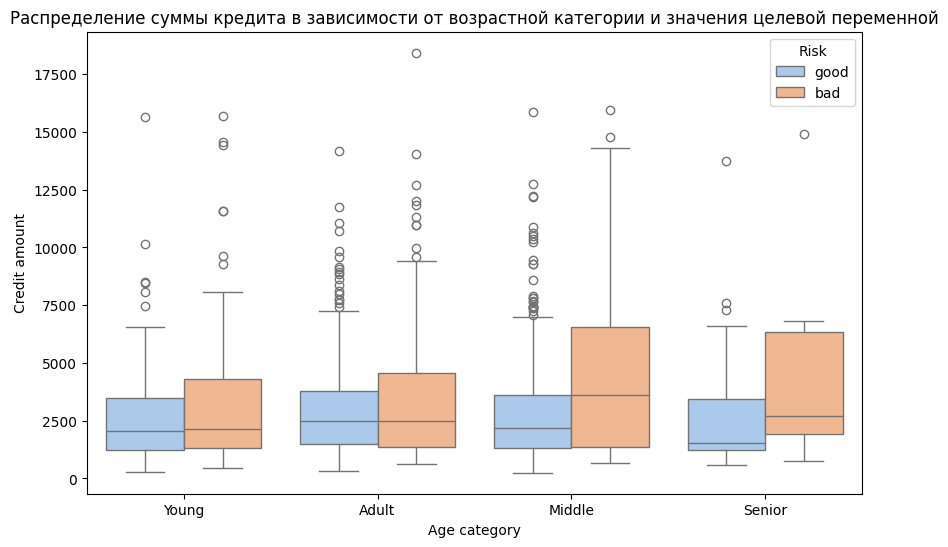

In [11]:
pastel_palette = sns.color_palette("pastel", n_colors=2) 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age category', y='Credit amount', hue='Risk', palette=pastel_palette)
plt.title('Распределение суммы кредита в зависимости от возрастной категории и значения целевой переменной')
plt.show()

# Проследим зависимость между целевой переменной и формой собственности

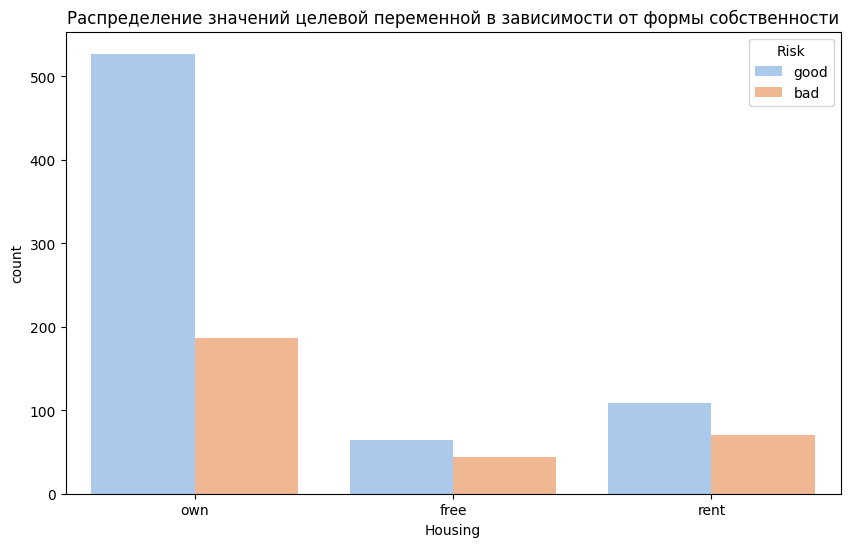

In [12]:
pastel_palette = sns.color_palette("pastel", n_colors=2)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Housing', hue='Risk', palette=pastel_palette)
plt.title('Распределение значений целевой переменной в зависимости от формы собственности')
plt.show()

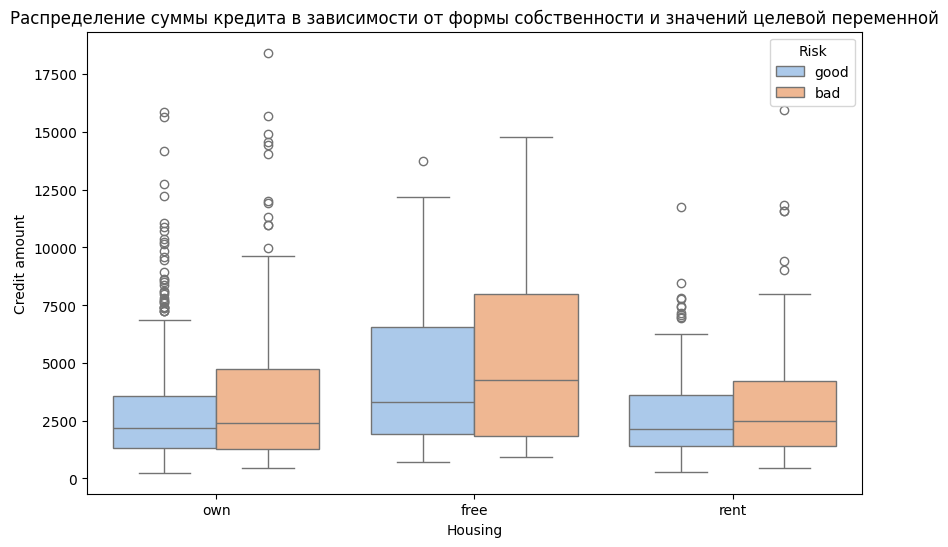

In [13]:
pastel_palette = sns.color_palette("pastel", n_colors=2)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Housing', y='Credit amount', hue='Risk', palette=pastel_palette)
plt.title('Распределение суммы кредита в зависимости от формы собственности и значений целевой переменной')
plt.show()

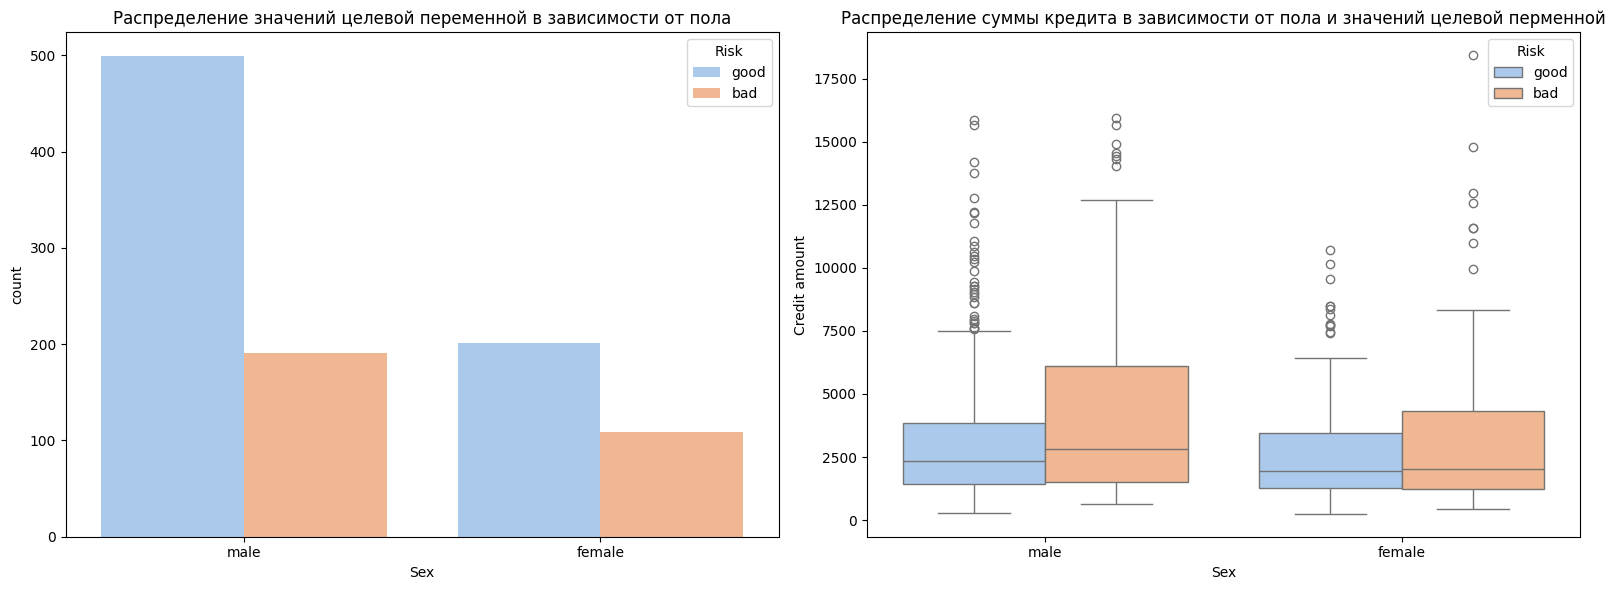

In [14]:
pastel_palette = sns.color_palette("pastel", n_colors=2) 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df, x='Sex', hue='Risk', ax=axes[0], palette=pastel_palette)
axes[0].set_title('Распределение значений целевой переменной в зависимости от пола')
sns.boxplot(data=df, x='Sex', y='Credit amount', hue='Risk', ax=axes[1], palette=pastel_palette)
axes[1].set_title('Распределение суммы кредита в зависимости от пола и значений целевой перменной')

plt.tight_layout()
plt.show()

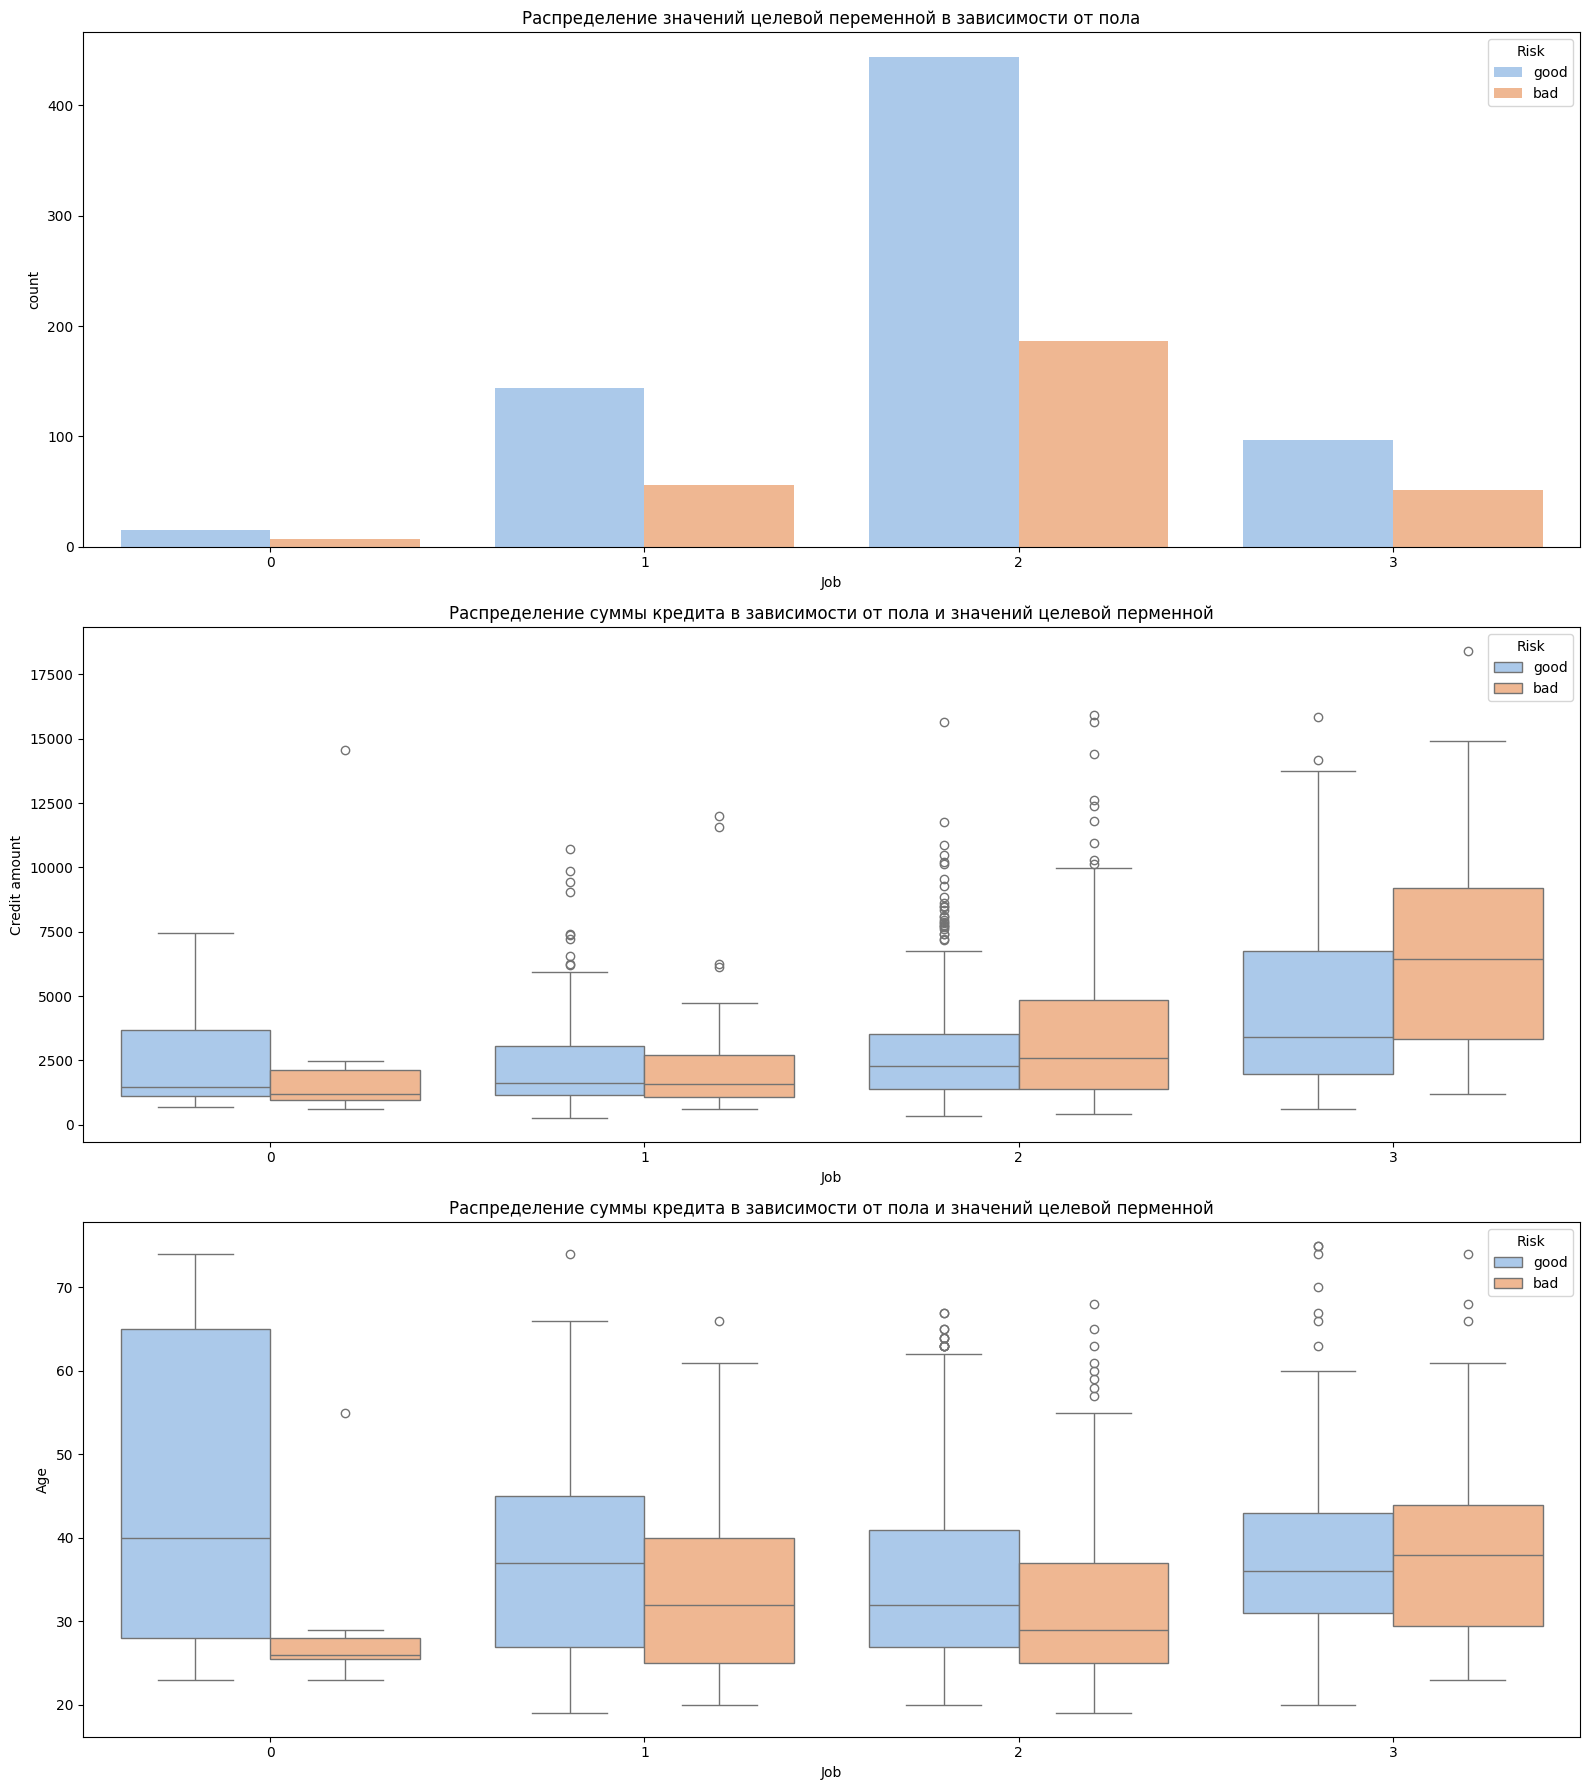

In [15]:
pastel_palette = sns.color_palette("pastel", n_colors=2) 
fig, axes = plt.subplots(3, 1, figsize=(16, 18))

sns.countplot(data=df, x='Job', hue='Risk', ax=axes[0], palette=pastel_palette)
axes[0].set_title('Распределение значений целевой переменной в зависимости от пола')
sns.boxplot(data=df, x='Job', y='Credit amount', hue='Risk', ax=axes[1], palette=pastel_palette)
axes[1].set_title('Распределение суммы кредита в зависимости от пола и значений целевой перменной')
sns.boxplot(data=df, x='Job', y='Age', hue='Risk', ax=axes[2], palette=pastel_palette)
axes[2].set_title('Распределение суммы кредита в зависимости от пола и значений целевой перменной')

plt.tight_layout()
plt.show()

# Кодирование категориальных переменных

In [16]:
# заполняем пропуски 
df['Saving accounts'] = df['Saving accounts'].fillna('no_inf')
df['Checking account'] = df['Checking account'].fillna('no_inf')

In [17]:
df = df.merge(pd.get_dummies(df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.Risk, prefix='Risk'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["Age category"], drop_first=True, prefix='Age category'), left_index=True, right_index=True)

In [18]:
df1 = df.drop(columns=["Saving accounts", "Checking account", "Purpose", "Sex", "Housing", "Age category", "Risk", 'Risk_good'])

In [19]:
df1

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_no_inf,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_no_inf,Check_rich,Age category_Adult,Age category_Middle,Age category_Senior
0,67,2,1169,6,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,22,2,5951,48,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
2,49,1,2096,12,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,45,2,7882,42,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,53,2,4870,24,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
996,40,3,3857,30,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
997,38,2,804,12,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
998,23,2,1845,45,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


# Корреляционный анализ

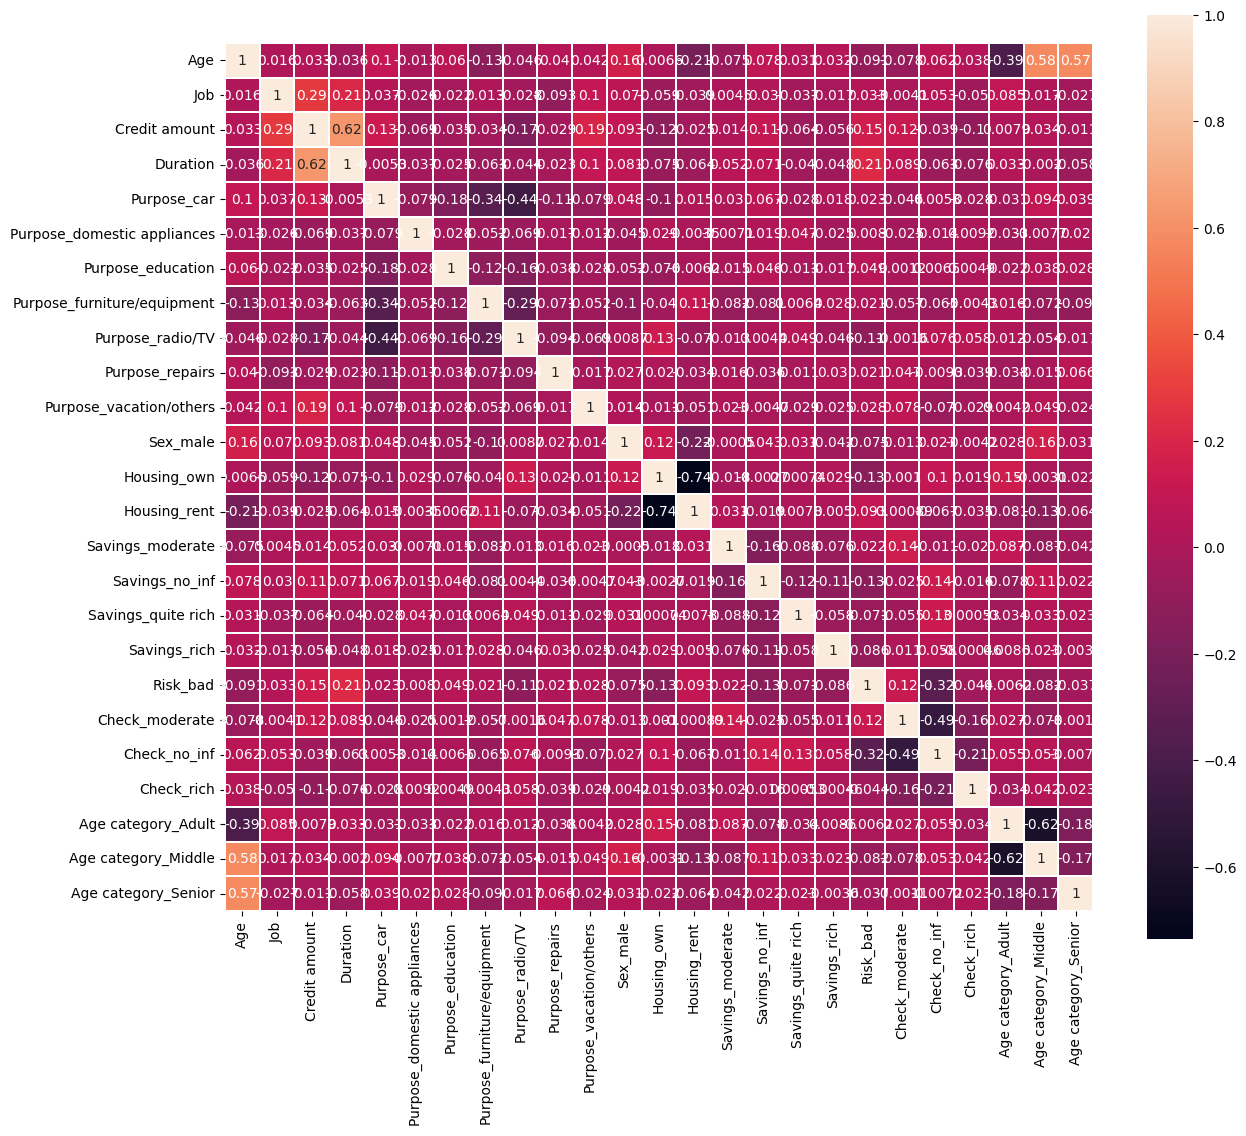

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df1.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,  linecolor='white', annot=True)
plt.show()

# Нормализация

In [21]:
# нормализация
df1['Credit amount'] = np.log(df1['Credit amount'])
df1['Credit amount']

0      7.063904
1      8.691315
2      7.647786
3      8.972337
4      8.490849
         ...   
995    7.459339
996    8.257645
997    6.689599
998    7.520235
999    8.428581
Name: Credit amount, Length: 1000, dtype: float64

# Разбиение данных

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X = df1.drop('Risk_bad', axis=1).values
y = df["Risk_bad"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
r_state = 7
tree_model = DecisionTreeClassifier(random_state=7)

# Настройка гиперпараметров

In [23]:
from sklearn.model_selection import GridSearchCV

# Задание параметров для поиска
param_grid = {
    'max_depth': range(1,7),
    'min_samples_split': range(2,10),
    'min_samples_leaf': range(1,10),
}

# Настройка Grid Search
grid_search = GridSearchCV(tree_model, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.73


# Проверка важности переменных

In [24]:
tree_model.fit(X_train,y_train)
feature_importances = tree_model.feature_importances_
features = pd.DataFrame({
    'Feature': df1.drop('Risk_bad', axis=1).columns.tolist(),
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

In [25]:
features

,Feature,Importance
2,Credit amount,0.250381
3,Duration,0.141134
0,Age,0.136141
19,Check_no_inf,0.099752
1,Job,0.056322
8,Purpose_radio/TV,0.034022
18,Check_moderate,0.027945
16,Savings_quite rich,0.025256
11,Sex_male,0.025094
15,Savings_no_inf,0.024443


# Предсказания на тестовой выборке

In [26]:
y_pred = grid_search.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score

# Расчет различных метрик производительности
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rau = roc_auc_score(y_test, y_pred)

# Вывод результатов
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("Roc-auc:", rau)

Accuracy: 0.7
Recall: 0.3888888888888889
Precision: 0.4745762711864407
F1 Score: 0.42748091603053434
Roc-auc: 0.6073657927590512


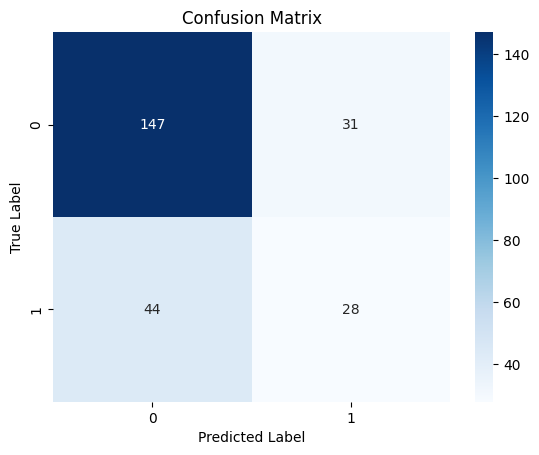

In [28]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()